In [67]:
from econ_lib import data_dir
print(data_dir)

import numpy as np 
import pandas as pd

/Users/annaliang/Documents/Repositories/econ6912-replication/src/data


In [68]:
mdata_filepath = data_dir / "quarterly_data_AUS.xlsx"
mdata = pd.read_excel(mdata_filepath)
colnames = ['year', 'quarter', 'CPI', 'IP', '2YRate', '3YSpread', 'HP', 'rents', 'HO']
mdata.columns = colnames
mdata

,year,quarter,CPI,IP,2YRate,3YSpread,HP,rents,HO
0,2005,1,82.1,65.4,5.365000,0.756993,81.3168,70.9,69.3
1,2005,2,82.6,66.3,5.258725,0.585769,80.4252,71.4,69.3
2,2005,3,83.4,65.8,5.156753,0.657308,81.5955,71.8,69.3
3,2005,4,83.8,65.6,5.299302,0.618323,81.8004,72.3,69.3
4,2006,1,84.5,65.1,5.230888,0.691225,83.3913,72.9,68.3
...,...,...,...,...,...,...,...,...,...
59,2019,4,116.2,103.0,0.769000,0.852333,116.3274,112.4,66.2
60,2020,1,116.6,102.9,0.615333,0.938667,116.4502,112.5,NaN
61,2020,2,114.4,100.0,0.244333,1.278667,115.5269,111.0,NaN
62,2020,3,116.2,100.3,0.251333,0.664000,118.0338,110.8,NaN


In [69]:
# Apply transformations to full dataset
mdata.loc[:, ['CPI', 'IP', '2YRate', 'rents']] = np.log(mdata.loc[:,['CPI', 'IP', '2YRate', 'rents']])*100
mdata.iloc[:,10:15] = np.log(mdata.iloc[:,10:15])*100
mdata = mdata.fillna(0)
mdata

,year,quarter,CPI,IP,2YRate,3YSpread,HP,rents,HO
0,2005,1,440.793802,418.052226,167.989645,0.756993,81.3168,426.127043,69.3
1,2005,2,441.400968,419.418990,165.988862,0.585769,80.4252,426.829787,69.3
2,2005,3,442.364831,418.661984,164.030710,0.657308,81.5955,427.388448,69.3
3,2005,4,442.843301,418.357570,166.757517,0.618323,81.8004,428.082413,69.3
4,2006,1,443.675153,417.592455,165.458099,0.691225,83.3913,428.908864,68.3
...,...,...,...,...,...,...,...,...,...
59,2019,4,475.531284,463.472899,-26.266431,0.852333,116.3274,472.206394,66.2
60,2020,1,475.874927,463.375764,-48.559115,0.938667,116.4502,472.295322,0.0
61,2020,2,473.970108,460.517019,-140.922187,1.278667,115.5269,470.953020,0.0
62,2020,3,475.531284,460.816569,-138.097520,0.664000,118.0338,470.772677,0.0


In [70]:
pdata_filepath = data_dir / "asx-shock.csv"
pdata = pd.read_csv(pdata_filepath)

pdata['date_time'] = pd.to_datetime(pdata['date_time'])
pdata.columns = ['date', 'shock']

pdata = pdata.set_index(pdata.columns[0])
pdata['agg_shock'] = pdata['shock'].rolling(3).mean()
pdata

,shock,agg_shock
date,,
2001-04-04 09:30:00+00:00,-0.505615,NaN
2001-05-02 09:30:00+00:00,0.533319,NaN
2001-06-06 09:30:00+00:00,0.390796,0.139500
2001-07-04 09:30:00+00:00,-0.715598,0.069506
2001-08-08 09:30:00+00:00,0.120268,-0.068178
...,...,...
2019-08-06 14:30:00+00:00,-0.320296,-0.120073
2019-09-03 14:30:00+00:00,-0.276798,-0.317701
2019-10-01 14:30:00+00:00,0.678625,0.027177


In [71]:
pdata['year'] = pdata.index.year
pdata['month'] = pdata.index.month
pdata['quarter'] = pdata.index.quarter

# Keep rows at the quarter end, i.e. that show averages over a quarter
pdata = pdata[pdata['month'].isin([3, 6, 9, 12])]
pdata = pdata[['year','quarter','agg_shock']]
pdata.reset_index(drop=True, inplace=True)

pdata

,year,quarter,agg_shock
0,2001,2,0.139500
1,2001,3,-0.296974
2,2001,4,0.179341
3,2002,1,0.130375
4,2002,2,0.147769
...,...,...,...
70,2018,4,0.031652
71,2019,1,-0.293918
72,2019,2,-0.030503
73,2019,3,-0.317701


In [72]:
ppdata = mdata[['year', 'quarter']]
ppdata = ppdata.merge(pdata, on=['year', 'quarter'], how='left')
ppdata = ppdata.fillna(0)
ppdata

,year,quarter,agg_shock
0,2005,1,-0.047600
1,2005,2,-0.015776
2,2005,3,0.184118
3,2005,4,-0.249103
4,2006,1,-0.522553
...,...,...,...
59,2019,4,0.147255
60,2020,1,0.000000
61,2020,2,0.000000
62,2020,3,0.000000


In [73]:
from dataclasses import dataclass
from scripts.classes import VARStruct, ModelStruct, VARciStruct
import sys
sys.path.append('/Users/annaliang/Documents/Repositories/econ6912-replication/src/scripts')
from functions import doProxySVAR, doProxySVARci

# Parameters
nboot = 5000; # Number of Bootstrap Samples (Paper does 5000)
clevel = 68; # Bootstrap Percentile Shown
BlockSize = int(np.floor(5.03*len(mdata)**0.25)); # size of blocks in the MBB bootstrap
seed = 2; # seed for random number generator
np.random.seed(seed)
p=2
irhor=20

In [74]:
VAR = VARStruct(p, irhor, vars=mdata[['CPI', 'IP', '2YRate', '3YSpread', 'rents']], proxies=ppdata[['agg_shock']])
modelVAR = doProxySVAR(VAR)
modelVAR.irs

VARci = doProxySVARci(VAR, modelVAR, clevel, nboot, BlockSize)

In [75]:
shocksize = -0.25
shock = 1

modelVAR.irs = modelVAR.irs * shocksize
VARci.irsH = VARci.irsH * shocksize
VARci.irsL = VARci.irsL * shocksize
VARci.irs = VARci.irs * shocksize

/var/folders/jl/qzzscdqx67nglkw8bx8mhjjh0000gn/T/ipykernel_8697/2519746581.py:35: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


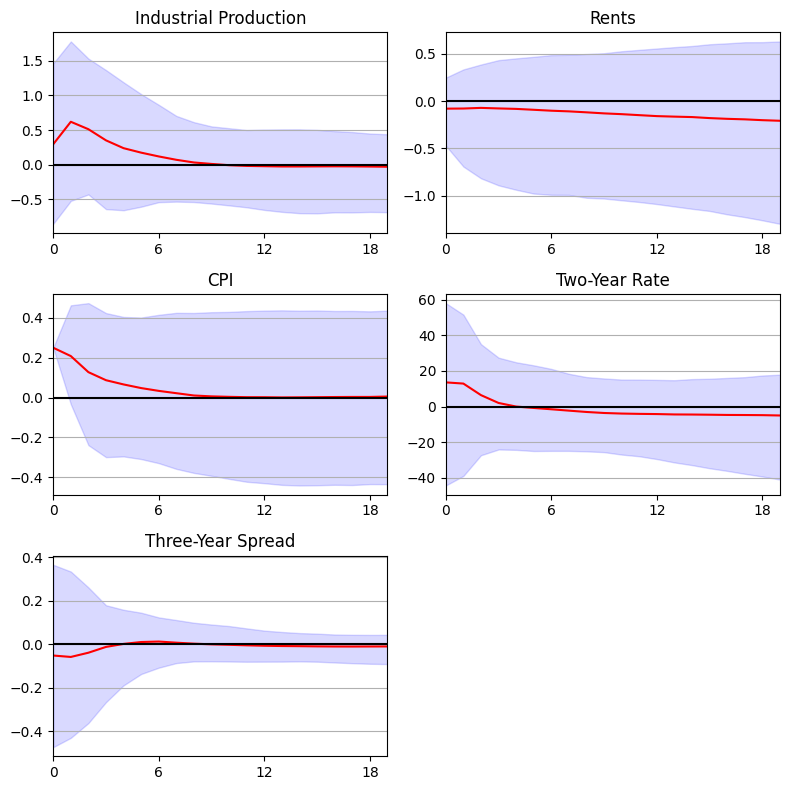

In [76]:
import matplotlib.pyplot as plt
# 'CPI', 'IP', '2YRate', '3YSpread', 'rents'
plotdisplay = ['IP', 'rents', 'CPI', '2YRate', '3YSpread']
FigLabels = ['Industrial Production', 'Rents', 'CPI', 'Two-Year Rate', 'Three-Year Spread']

display1 = np.array([1,4,0,2,3])

fig, axes = plt.subplots(3, 2, figsize=(8,8), constrained_layout=True)
axes = axes.flatten()

for nvar in range(len(display1)):
    if VARci is not None:
        ax = axes[nvar]
        h, = ax.plot(range(VAR.irhor), VARci.irs.iloc[:, display1[nvar]], 'r', linewidth=1.5)
        
        # if nvar == 1:
        #     ax.set_ylim([-0.2, 0.6])
        #     ax.set_yticks(np.arange(-0.2, 0.7, 0.2))
        
        ax.set_xlim([0, VAR.irhor - 1])
        
        if VARci.irsH is not None:
            ax.fill_between(range(VAR.irhor), VARci.irsH.iloc[:, display1[nvar]], VARci.irsL.iloc[:, display1[nvar]], color='blue', alpha=0.15)
        
        ax.axhline(0, color='k', linestyle='-')
        title_text = FigLabels[nvar]
        ax.set_title(title_text, fontsize=12)
        ax.set_xticks(np.arange(0, VAR.irhor, 6))
        ax.grid(True)
        ax.xaxis.grid(False)
        ax.yaxis.grid(True)

axes.flat[-1].set_visible(False) # to remove last plot

plt.tight_layout()
plt.show()

In [ ]:
# domestic final demand in GDP

# James Morley
# Brendan Bhaer

